In [1]:
import LoadAndPreprocessDataset

Loading  100  files (seconds): 0.8407127857208252
Size of X:	12800000 bytes
Shape of X:	 (100, 16000)
Transforming  100  elements (seconds): 0.3017594814300537
Size of trasformed: 	8064000 bytes
Shape of transformed:	 (100, 80, 126)
(100, 80, 126)


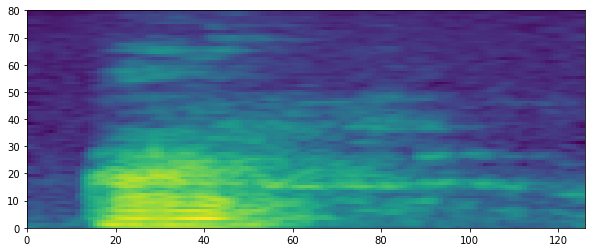

In [9]:
import time
import matplotlib.pyplot as plt

#Load filenames
train,val,test = LoadAndPreprocessDataset.loadDatasetFilenames()

#batch_size=len(test)
batch_size=100

start = time.time()
#Load Trainfiles
X,y=LoadAndPreprocessDataset.loadBatch(train,batch_size=batch_size)
end = time.time()
print("Loading ", batch_size, " files (seconds):", end - start)
print("Size of X:\t%d bytes" % (X.nbytes))
print("Shape of X:\t",X.shape)

start = time.time()
#Extract features
#features=LoadAndPreprocessDataset.MFCC_DELTA_12(X)
features=LoadAndPreprocessDataset.melspect(X)
end = time.time()
print("Transforming ", batch_size, " elements (seconds):", end - start)
print("Size of trasformed: \t%d bytes" % (features.nbytes))
print("Shape of transformed:\t",features.shape)

print(features.shape)
plt.figure(figsize=(10, 4))
plt.pcolormesh(features[0])
plt.show()

In [3]:
del(X)

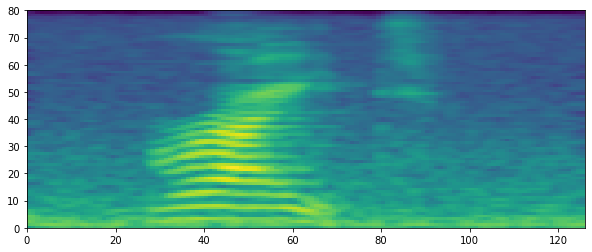

In [4]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(features[10])
plt.show()

0.79959106
0.06346298


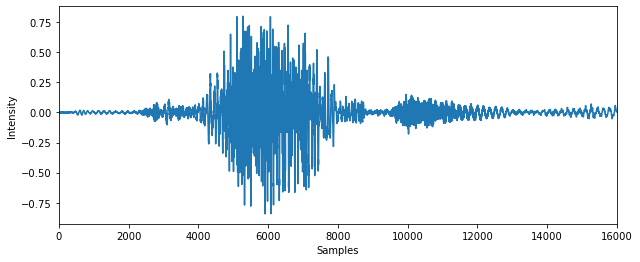

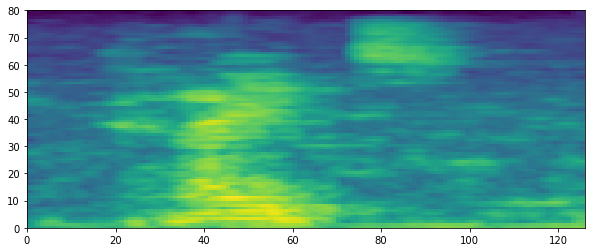

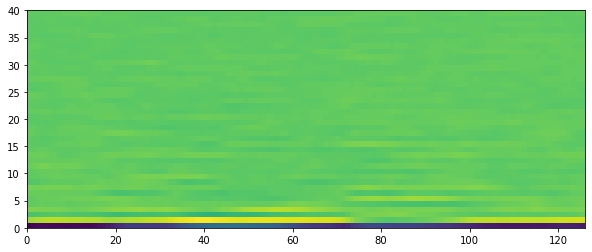

In [21]:
import numpy as np
import librosa # mfcc functions

sr=16000	#Sampling rate of audiofiles


y=np.load("sd_GSCmdV2/test/right/3d86b69a_nohash_2.wav.npy")

print(np.max(y))
print(np.mean(np.abs(y)))

import sounddevice as sd
sd.play(y, sr)

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=1024,
										hop_length=128, power=1.0,
										n_mels=80, fmin=40.0, fmax=sr/2)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y)
plt.xlabel("Samples")
plt.ylabel("Intensity")
plt.xlim(0, len(y))
plt.show()

plt.figure(figsize=(10, 4))
plt.pcolormesh(log_S)
plt.show()

mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=40)
plt.figure(figsize=(10, 4))
plt.pcolormesh(mfcc)
plt.show()